## Importing Libraries 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Reading and Preparing the Data

In [2]:
df = pd.read_csv("../data/Sunspots.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3265 non-null   int64  
 1   Date                               3265 non-null   object 
 2   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.7+ KB


In [3]:
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

## Statistical Analysis

In [6]:
df.describe()

,Date,Monthly Mean Total Sunspot Number
count,3265,3265.000000
mean,1885-01-29 02:35:41.255742976,81.778775
min,1749-01-31 00:00:00,0.000000
25%,1817-01-31 00:00:00,23.900000
50%,1885-01-31 00:00:00,67.200000
75%,1953-01-31 00:00:00,122.500000
max,2021-01-31 00:00:00,398.200000
std,NaN,67.889277


## Boxplot to Visualize Data Distribution Summary

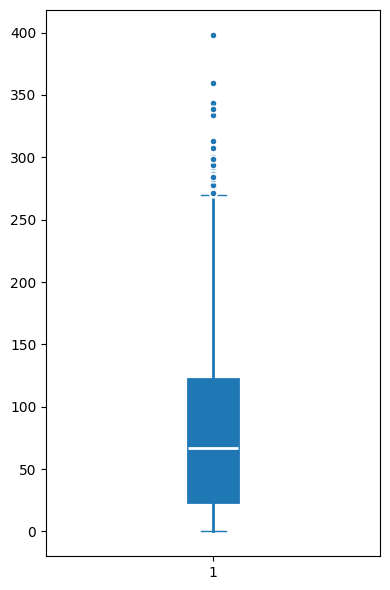

In [7]:
plt.figure(figsize=[4,6])
plt.boxplot(df['Monthly Mean Total Sunspot Number'],
            patch_artist=True,
            boxprops=dict(facecolor='C0',color="C0",linewidth=2),
            capprops=dict(color="C0"),
            whiskerprops=dict(color="C0",linewidth=2),
            medianprops=dict(color="white",linewidth=2),
            flierprops=dict(markeredgecolor='white',markerfacecolor="C0",markersize=5))
plt.tight_layout()
plt.show()

Using the boxplot and descriptive statistics, we are able to identify that 75% of the data lies from 0 to 122. There are a some outiers within the data,
which seems to natural for the data, but might be harder for us to forecast such cases

## Time Series Graph of the Entire Data

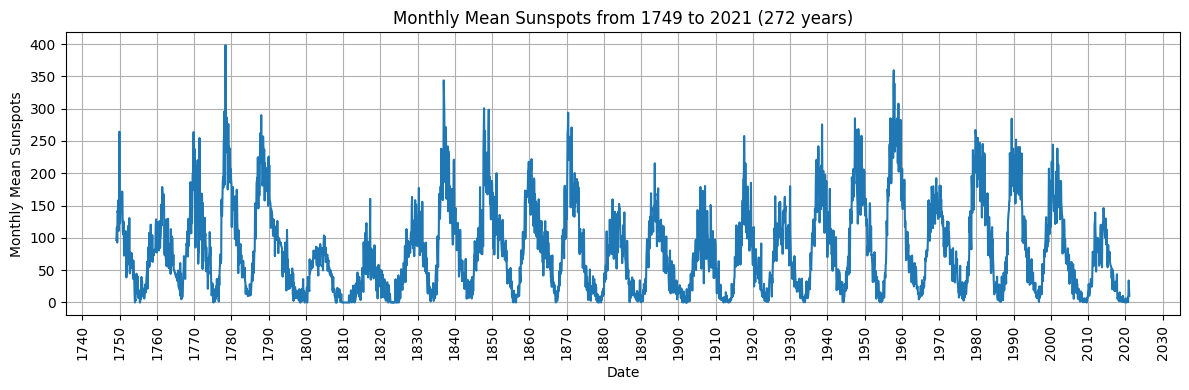

In [8]:
plt.figure(figsize=[12,4])
df_idx = df.set_index(['Date'],drop=False)
plt.plot(df_idx['Date'],df_idx['Monthly Mean Total Sunspot Number'])

plt.xlabel('Date')
plt.ylabel('Monthly Mean Sunspots')
plt.xticks(rotation=90)
plt.title(f'Monthly Mean Sunspots from 1749 to 2021 ({2021-1749} years)')

# Set major ticks locator to every 10 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.grid()
plt.show()

The dataset exhibits cyclic behavior with peak and trough values occurring every 10 years. Additionally, it reveals an underlying pattern that 
repeats over longer intervals of 30, 60, and 120 years.